# Dask

### Threads vs Processes

##### Threads
- very fast to initiate
- share memory space with main session
- no memory transfer needed
- limited by the GIL which allows one thread to read the code at once


##### Processes
- take time and memory to set up
- have separate memory pools
- very slow to transfer data between themselves and to the main Python session
- each have their own GIL so don't need to take turns reading the code

In [1]:
from dask import delayed
import dask

import graphviz

### delayed function call

In [2]:
def func(x):
    return x**2

# call the function
delayed_result = delayed(func)(4)
print(delayed_result)

# actually compute it
actual_result = delayed_result.compute()
actual_result

Delayed('func-f3ac46f3-87c2-4401-a43d-241247766322')


16

### bad usage: no parallel computing (just sequential)

In [3]:
# INefficient code:
delayed1 = delayed(func)(3) + 4
delayed2 = delayed(func)(3) - 5

result1 = delayed1.compute()
result2 = delayed2.compute()

result1, result2

(13, 4)

### good usage: multi-threading

In [10]:
result1, result2 = dask.compute(delayed1, delayed2)
result1, result2

(13, 4)

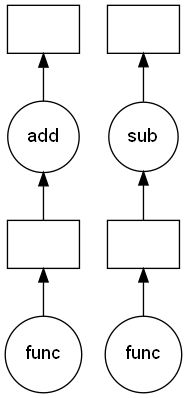

In [11]:
dask.visualize(delayed1, delayed2)